In [2]:
import numpy as np
from tensorflow.keras.models import load_model
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
#%matplotlib notebook

model = load_model('i_predict CD_3D+O2dist')

In [3]:
sc = StandardScaler()

In [41]:
df_aa = pd.read_csv('CD_3D+O2dist 0.4-0.9V_std', usecols=[1,2,3,4,5,6])
df_aa

,x座標,y座標,z座標,V[V],i[A/m^2],c[mol/m^3]
0,1.420172,1.384978,-0.861169,-1.581139,3.455970,-1.925401
1,1.420172,1.384978,-0.685161,-1.581139,3.420147,-1.724659
2,1.420172,1.384978,-0.685161,-1.581139,2.132504,-1.724659
3,1.201894,1.384978,-0.685161,-1.581139,3.495648,-1.684654
4,1.201894,1.384978,-0.685161,-1.581139,2.171459,-1.684654
...,...,...,...,...,...,...
85091,1.420172,-1.333808,-0.093022,1.581139,-0.478544,0.974895
85092,1.420172,-1.333808,0.001268,1.581139,-0.478544,0.977791
85093,1.420172,-1.333808,-0.308003,1.581139,-0.478544,0.961711
85094,1.420172,-1.333808,-0.247657,1.581139,-0.478544,0.966292


In [70]:
df_aa2 = df_aa[df_aa['c[mol/m^3]'].isin([0])]
df_aa2#これはない

,x座標,y座標,z座標,V[V],i[A/m^2],c[mol/m^3]


In [42]:
df_ab = pd.read_csv('CD_3D+O2dist 0.4-0.9V', usecols=[1,2,3,4,5,6])
df_ab

,x座標,y座標,z座標,V[V],i[A/m^2],c[mol/m^3]
0,0.000800,0.010638,0.000617,0.4,28465.620805,0.000000
1,0.000800,0.010638,0.000650,0.4,28206.447108,0.348312
2,0.000800,0.010638,0.000650,0.4,18890.539763,0.348312
3,0.000738,0.010638,0.000650,0.4,28752.683509,0.417725
4,0.000738,0.010638,0.000650,0.4,19172.376584,0.417725
...,...,...,...,...,...,...
85091,0.000800,0.000197,0.000762,0.9,0.000000,5.032360
85092,0.000800,0.000197,0.000780,0.9,0.000000,5.037386
85093,0.000800,0.000197,0.000721,0.9,0.000000,5.009484
85094,0.000800,0.000197,0.000733,0.9,0.000000,5.017434


In [74]:
df_ab1=df_ab.head(7225)

In [45]:
df_ab2 = df_ab[df_ab['c[mol/m^3]'].isin([0])]
df_ab2

,x座標,y座標,z座標,V[V],i[A/m^2],c[mol/m^3]
0,0.000800,0.010638,0.000617,0.4,28465.620805,0.0
5,0.000800,0.010441,0.000617,0.4,28380.856979,0.0
8,0.000738,0.010638,0.000583,0.4,29163.538707,0.0
9,0.000800,0.010638,0.000583,0.4,28874.639444,0.0
10,0.000800,0.010441,0.000583,0.4,28810.939272,0.0
...,...,...,...,...,...,...
78661,0.000123,0.000000,0.000583,0.9,4954.222383,0.0
78662,0.000000,0.000000,0.000550,0.9,4981.427134,0.0
78663,0.000062,0.000000,0.000550,0.9,4978.597364,0.0
78664,0.000123,0.000000,0.000550,0.9,4963.028442,0.0


In [46]:
df_c = df_ab2[df_ab2['V[V]'].isin([0.4])].head(1037)#最後の行だけiの値がおかしいため、削除
df_c

,x座標,y座標,z座標,V[V],i[A/m^2],c[mol/m^3]
0,0.000800,0.010638,0.000617,0.4,28465.620805,0.0
5,0.000800,0.010441,0.000617,0.4,28380.856979,0.0
8,0.000738,0.010638,0.000583,0.4,29163.538707,0.0
9,0.000800,0.010638,0.000583,0.4,28874.639444,0.0
10,0.000800,0.010441,0.000583,0.4,28810.939272,0.0
...,...,...,...,...,...,...
1300,0.000185,0.000000,0.000550,0.4,33355.755291,0.0
1301,0.000123,0.000000,0.000583,0.4,33586.693133,0.0
1302,0.000000,0.000000,0.000550,0.4,33665.185859,0.0
1303,0.000062,0.000000,0.000550,0.4,33678.954309,0.0


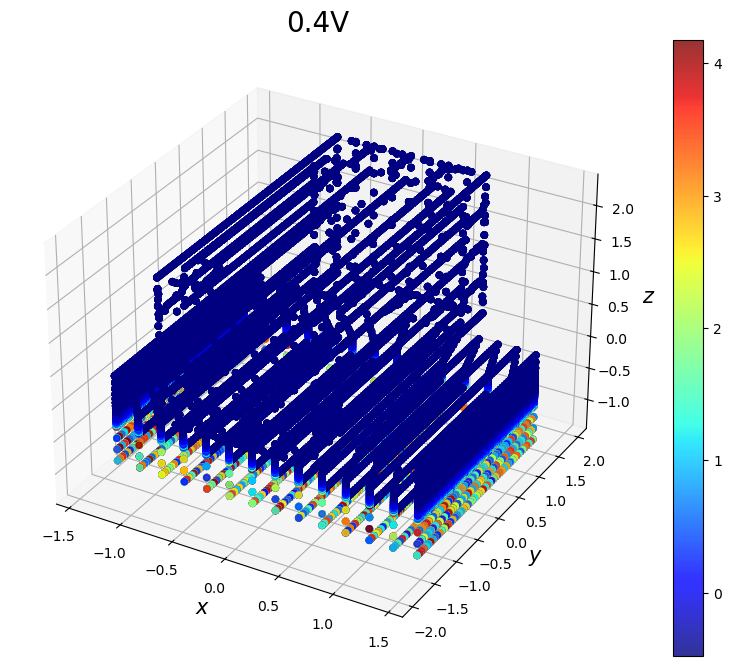

In [47]:
#正規化されてるグラフ
fig1 = plt.figure(figsize=(12, 8))
ax1 = fig1.add_subplot(111, projection='3d')

sc1 = ax1.scatter3D(df_aa['x座標'], df_aa['y座標'],df_aa['z座標'], c=df_aa['i[A/m^2]'], cmap='jet', alpha=0.8) 
plt.colorbar(sc1)

ax1.set_title("0.4V", fontsize=20)
ax1.set_xlabel('$x$', fontsize=15)
ax1.set_ylabel('$y$', fontsize=15)
ax1.set_zlabel('$z$', fontsize=15)

plt.show()

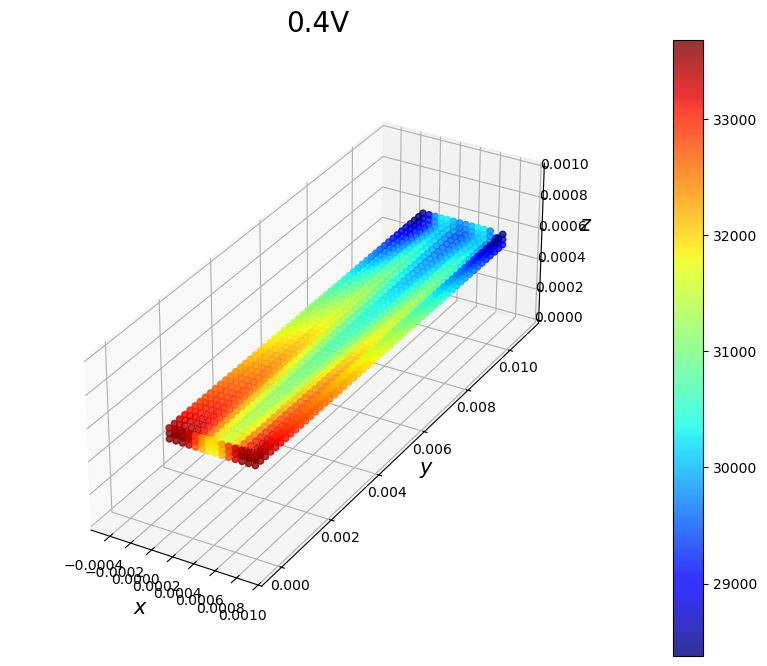

In [48]:
#正規化されてないグラフ
fig2 = plt.figure(figsize=(12, 8))
ax2 = fig2.add_subplot(111, projection='3d')

sc2 = ax2.scatter(df_c['x座標'], df_c['y座標'],df_c['z座標'], c=df_c['i[A/m^2]'], cmap='jet', alpha=0.8)
plt.colorbar(sc2)

ax2.set_title("0.4V", fontsize=20)
ax2.set_xlabel('$x$', fontsize=15)
ax2.set_ylabel('$y$', fontsize=15)
ax2.set_zlabel('$z$', fontsize=15)
ax2.set_box_aspect((1,3,1))

ax2.set_xlim(-0.00055,0.001)
#ax2.set_ylim(0,0.015)
ax2.set_zlim(0,0.001)

plt.savefig('PEM_CD_COMSOL.png')
plt.show()
#グラフの天井が無いから変に見える。

In [49]:
df_v = df_aa.loc[:,'V[V]']
v_mean = df_v.mean()
v_std = df_v.std()
print(v_mean)
print(v_std)

-1.0687866665565105e-16
1.0000058757686299


In [50]:
#predictで正規化された出力求める→全てのパラメータを正規化から戻す

In [51]:
#v_a =   np.array(v)*v_std + v_mean 

In [52]:
#v_a

In [53]:
df_V = pd.DataFrame([0.4,0.45,0.5,0.55,0.6,0.65,0.7,0.75,0.8,0.85,0.9])
print(df_V.mean())
print(df_V.std())

0    0.65
dtype: float64
0    0.165831
dtype: float64


In [54]:
V_pre = (0.42-df_V.mean())/df_V.std()
V_pre

0   -1.386952
dtype: float64

In [55]:
df_pre = pd.read_csv('CD_3D+O2dist 0.4-0.9V_std', usecols=[1,2,3])

In [56]:
df_pre = df_pre.head(7225)
df_pre

,x座標,y座標,z座標
0,1.420172,1.384978,-0.861169
1,1.420172,1.384978,-0.685161
2,1.420172,1.384978,-0.685161
3,1.201894,1.384978,-0.685161
4,1.201894,1.384978,-0.685161
...,...,...,...
7220,-0.512011,-0.102659,0.106872
7221,0.210743,-0.153957,0.106872
7222,-0.208014,-0.153957,0.106872
7223,0.514740,-0.205255,0.106872


In [57]:
df_pre.insert(3, 'V[V]', -1.386952) 
df_pre

,x座標,y座標,z座標,V[V]
0,1.420172,1.384978,-0.861169,-1.386952
1,1.420172,1.384978,-0.685161,-1.386952
2,1.420172,1.384978,-0.685161,-1.386952
3,1.201894,1.384978,-0.685161,-1.386952
4,1.201894,1.384978,-0.685161,-1.386952
...,...,...,...,...
7220,-0.512011,-0.102659,0.106872,-1.386952
7221,0.210743,-0.153957,0.106872,-1.386952
7222,-0.208014,-0.153957,0.106872,-1.386952
7223,0.514740,-0.205255,0.106872,-1.386952


In [58]:
df_i_pre = pd.DataFrame(model.predict(df_pre), columns = ['i[A/m^2]','c[mol/m^3]'])

226/226 [==============================] - 0s 2ms/step


In [59]:
df_i_pre

,i[A/m^2],c[mol/m^3]
0,3.380836,-1.939465
1,2.731184,-1.628736
2,2.731184,-1.628736
3,2.389606,-1.474715
4,2.389606,-1.474715
...,...,...
7220,-0.479075,0.207947
7221,-0.479703,0.498955
7222,-0.479726,0.495540
7223,-0.479206,0.271538


In [60]:
df = pd.concat([df_pre, df_i_pre], axis=1)

In [61]:
df_b = df.head(7225)
df_b

,x座標,y座標,z座標,V[V],i[A/m^2],c[mol/m^3]
0,1.420172,1.384978,-0.861169,-1.386952,3.380836,-1.939465
1,1.420172,1.384978,-0.685161,-1.386952,2.731184,-1.628736
2,1.420172,1.384978,-0.685161,-1.386952,2.731184,-1.628736
3,1.201894,1.384978,-0.685161,-1.386952,2.389606,-1.474715
4,1.201894,1.384978,-0.685161,-1.386952,2.389606,-1.474715
...,...,...,...,...,...,...
7220,-0.512011,-0.102659,0.106872,-1.386952,-0.479075,0.207947
7221,0.210743,-0.153957,0.106872,-1.386952,-0.479703,0.498955
7222,-0.208014,-0.153957,0.106872,-1.386952,-0.479726,0.495540
7223,0.514740,-0.205255,0.106872,-1.386952,-0.479206,0.271538


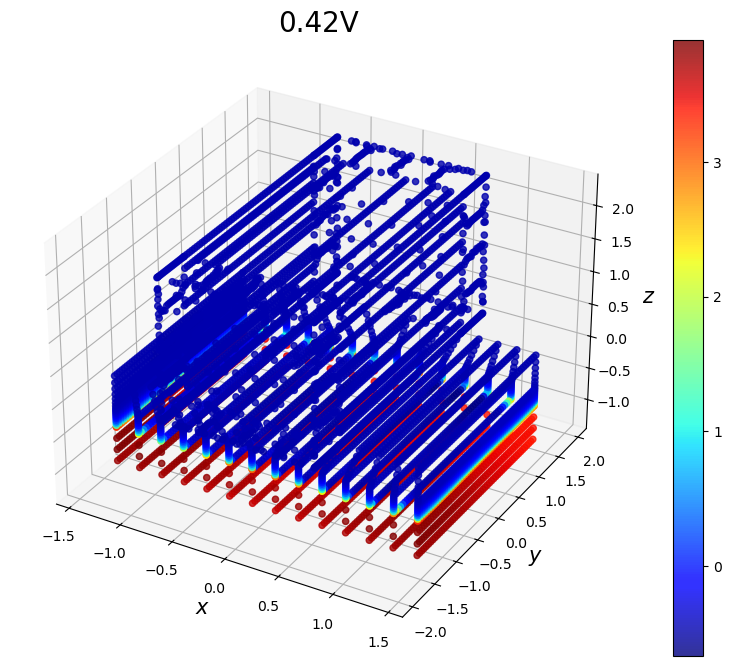

In [62]:
fig3 = plt.figure(figsize=(12, 8))
ax3 = fig3.add_subplot(111, projection='3d')

sc3 = ax3.scatter(df_b['x座標'], df_b['y座標'],df_b['z座標'], c=df_b['i[A/m^2]'], cmap='jet', alpha=0.8)
plt.colorbar(sc3)

ax3.set_title("0.42V", fontsize=20)
ax3.set_xlabel('$x$', fontsize=15)
ax3.set_ylabel('$y$', fontsize=15)
ax3.set_zlabel('$z$', fontsize=15)


plt.show()
#plt.savefig('PEM_CD_Predict_stdL.png')

In [63]:
df_i = pd.read_csv('CD_3D+O2dist 0.4-0.9V', usecols=[5])

In [64]:
df_i.mean()

i[A/m^2]    3462.192704
dtype: float64

In [65]:
df_i.std()

i[A/m^2]    7234.893044
dtype: float64

In [66]:
df_i_re = (df_i_pre*df_i.std() + df_i.mean() ).head(7225) #iの予測値の標準化を戻す
df_i_re

,c[mol/m^3],i[A/m^2]
0,NaN,27922.176187
1,NaN,23222.020320
2,NaN,23222.020320
3,NaN,20750.733075
4,NaN,20750.733075
...,...,...
7220,NaN,-3.866805
7221,NaN,-8.409416
7222,NaN,-8.574147
7223,NaN,-4.809481


In [77]:
df_i_re_c = df_i_re.head(1037)

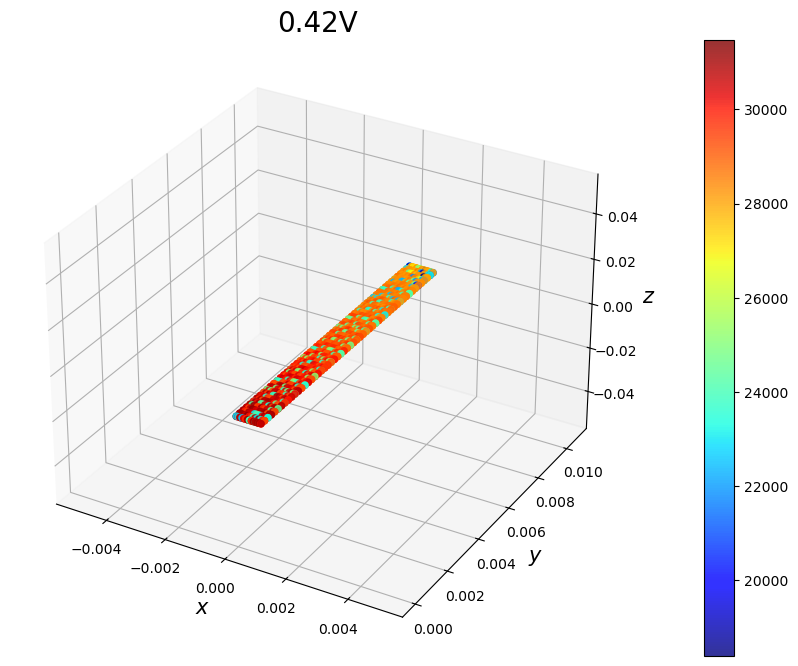

In [78]:
fig4 = plt.figure(figsize=(20, 8))
ax4 = fig4.add_subplot(111, projection='3d')

sc4 = ax4.scatter(df_c['x座標'], df_c['y座標'], df_c['z座標'],c=df_i_re_c['i[A/m^2]'], cmap='jet', alpha=0.8)
plt.colorbar(sc4)

ax4.set_title("0.42V", fontsize=20)
ax4.set_xlabel('$x$', fontsize=15)
ax4.set_ylabel('$y$', fontsize=15)
ax4.set_zlabel('$z$', fontsize=15)

ax4.set_xlim(-0.0055,0.0055)
ax4.set_zlim(-0.055,0.055)
plt.savefig('PEM_CD_Predict_0.42V.png')
plt.show()

In [79]:
df_d = pd.read_excel('/Users/aruhy/OneDrive/デスクトップ/data/10-26/CD_3D 0.42V.xlsx',names=['x座標','y座標','z座標','i[A/m^2]'] ,header=8) 

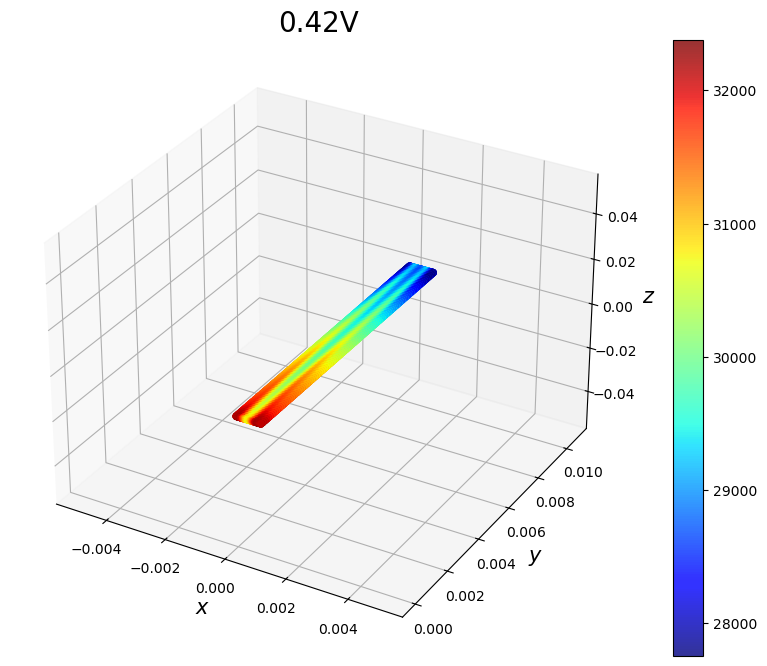

In [80]:
#COMSOLの結果
fig5 = plt.figure(figsize=(12, 8))
ax5 = fig5.add_subplot(111, projection='3d')

sc5 = ax5.scatter(df_d['x座標'], df_d['y座標'],df_d['z座標'], c=df_d['i[A/m^2]'], cmap='jet', alpha=0.8)
plt.colorbar(sc5)

ax5.set_title("0.42V", fontsize=20)
ax5.set_xlabel('$x$', fontsize=15)
ax5.set_ylabel('$y$', fontsize=15)
ax5.set_zlabel('$z$', fontsize=15)

ax5.set_xlim(-0.0055,0.0055)
#ax5.set_ylim(0,0.015)
ax5.set_zlim(-0.055,0.055)

plt.savefig('PEM_CD_COMSOL_0.42V.png')
plt.show()

In [81]:
#モデルの評価
from sklearn.metrics import mean_squared_error
mean_squared_error(df_i_re_c['i[A/m^2]'], df_d['i[A/m^2]'])

ValueError: Found input variables with inconsistent numbers of samples: [1037, 7225]